# Instructions

Travail individuel à réaliser par chaque étudiant. Chaque fichier devra ensuite être rassemblé par groupe dans le premier dépôt Git de l'année universitaire, dans un nouveau dossier nommé <code>Computer Vision</code>.

Le nom du fichier doit être le prénom de l'étudiant écrit en minuscules. Par exemple, si l'étudiant s'appelle BOB Toto, le fichier doit être nommé toto.ipynb.

# Détails de l'étudiant
### Nom(s)  : RANDRIAMBOLOLONIAINA
### Prénom(s) : Arikanto Ambinintsoa
### Classe : IMTICIA 4 n°04

# Vision par Ordinateur avec Keras/TensorFlow : Un Notebook Pratique et Conceptuel

Ce notebook a pour objectif de vous guider pas à pas dans la création et l'analyse d'un modèle de réseau de neurones convolutif (CNN) appliqué au jeu de données CIFAR-10. Chaque étape est accompagnée d'explications pratiques ainsi que de questions conceptuelles pour renforcer votre compréhension des enjeux théoriques et pratiques de la vision par ordinateur.

## Étape 1 : Introduction et Configuration de l'Environnement

Dans cette étape, nous allons configurer notre environnement de travail et importer les bibliothèques indispensables pour le deep learning et la manipulation de données. Nous vérifions également la version de TensorFlow pour nous assurer que tout fonctionne correctement.

### Explication Pratique
La bonne configuration de l'environnement est cruciale pour garantir la reproductibilité et la stabilité de vos expériences. En particulier, les versions des bibliothèques peuvent influencer le comportement du modèle et sa performance, d'où l'importance de vérifier et documenter ces versions dès le début.

In [1]:
# Importer les bibliothèques nécessaires
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

print('Version de TensorFlow :', tf.__version__)

Version de TensorFlow : 2.18.0


### Question  1

**Q1 :** Pourquoi est-il essentiel de vérifier la configuration de l'environnement (versions des bibliothèques, dépendances, etc.) avant de développer un modèle de deep learning ?

_Répondez dans une nouvelle cellule Markdown._

# 1- Réponse

Avant de développer un modèle de deep learning il est essentiel de vérifier la configuration de l'environnement car les bibliothèques comme tensorflow, pytorch ou numpy évoluent constamment donc certaines versions ne sont pas compatibles entre elles, les codes qui compilent dans une autre version ne peut pas fonctionner dans une différente version. Mais aussi un modèle de deep learning doit être entraîner dans un environnement stable.

## Étape 2 : Chargement et Prétraitement des Données

Nous allons charger le jeu de données CIFAR-10, composé de 60 000 images couleur réparties en 10 classes. Dans cette étape, nous normalisons les valeurs des pixels afin qu'elles soient comprises entre 0 et 1, et nous transformons les étiquettes en format one-hot pour faciliter le processus de classification.

### Explication Pratique
La normalisation aide à stabiliser et accélérer l'entraînement du modèle en assurant que les valeurs d'entrée ont une échelle comparable. Le one-hot encoding évite que le modèle interprète les étiquettes comme des valeurs numériques ordonnées, ce qui est essentiel pour les problèmes de classification multi-classes.

In [2]:
# Charger le jeu de données CIFAR-10
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Normaliser les valeurs des pixels (entre 0 et 1)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convertir les vecteurs de classes en matrices binaires (one-hot encoding)
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print("Forme des données d'entrainement :", x_train.shape)
print("Forme des étiquettes d'entraînement :", y_train.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Forme des données d'entrainement : (50000, 32, 32, 3)
Forme des étiquettes d'entraînement : (50000, 10)


### Question 2

**Q2 :** Expliquez comment la normalisation des pixels et le one-hot encoding des étiquettes contribuent chacun à la stabilité et à l'efficacité de l'entraînement d'un modèle de deep learning.

_Répondez dans une nouvelle cellule Markdown._

# 2- Réponse

La normalisation des pixels et le one-hot encoding des étiquettres sont deux techniques essentielles pour améliorer la stabilité et l'effacité de l'entraînement d'un modèle de deep learning.

La normalisation consiste à transformer les valeurs des pixels des images pour les ramener dans une plage plus appropriée, généralement entre [0,1] ou [-1,1].
Elle facilite l'apprentissage du modèle puisque les réseaux de neurones fonctionnent miuex lorsque les entrées ont une distribution centrée et réduite.

Le one-hot encoding transforme une classe catégorielle en un vecteur binaire. par exemple les classes catégorielles chat, chien ou oiseau peuvent être transformée en trois classe: chat" → [1, 0, 0] , "chien" → [0, 1, 0], "oiseau" → [0, 0, 1]
Ceci permet d'éviter les erreurs d'interprétation des étiquettes. Avec le one hot encoding, chaque classe est traitée indépendamment.

## Étape 3 : Exploration et Visualisation des Données

Avant de construire le modèle, il est important d'explorer et de visualiser les données. Nous affichons ainsi un échantillon d'images du jeu de données pour mieux comprendre leur contenu et la distribution des classes.

### Explication Pratique
La visualisation des données permet d'identifier d'éventuelles anomalies, comme des classes sous-représentées ou des images bruitées, et de décider si des techniques d'augmentation de données ou de prétraitement supplémentaires sont nécessaires.

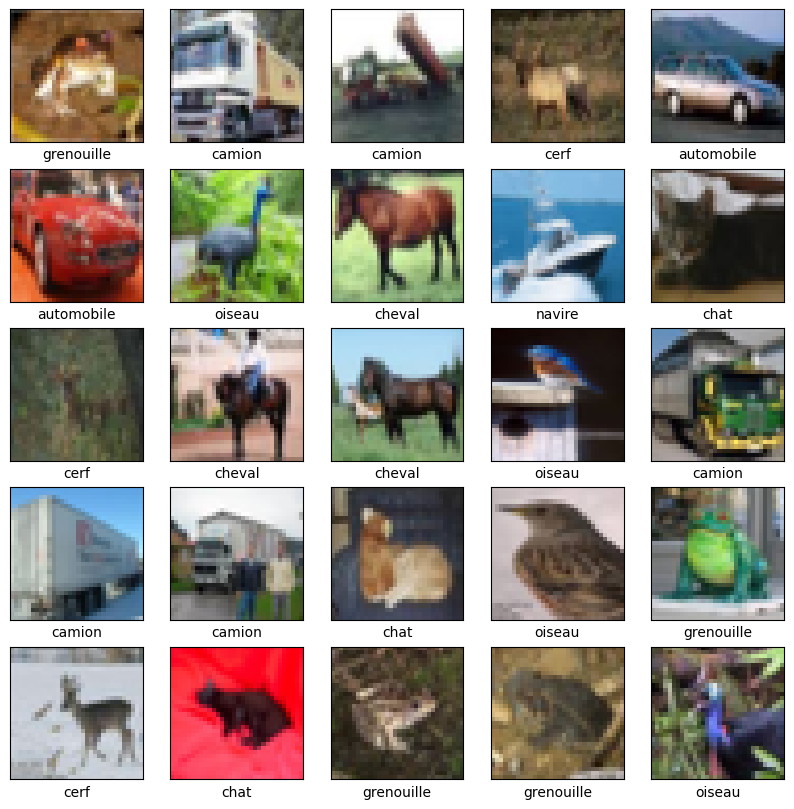

In [3]:
# Afficher quelques images du jeu de données d'entraînement
noms_classes = ['avion', 'automobile', 'oiseau', 'chat', 'cerf',
               'chien', 'grenouille', 'cheval', 'navire', 'camion']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(noms_classes[y_train[i].argmax()])
plt.show()

### Question 3

**Q3 :** D'après la visualisation, discutez de l'impact potentiel d'une distribution inégale des classes ou de la présence d'images de mauvaise qualité sur la performance d'un modèle de classification. Quelles stratégies pourraient être mises en place pour pallier ces problèmes ?

_Répondez dans une nouvelle cellule Markdown._

# 3- Réponse
Si certaines classes sont sur-représentées et d’autres sous-représentées, le modèle va favoriser les classes majoritaires et ignorer les classes rares. Le modèle pourrait simplement prédire la classe dominante la plupart du temps.
Les images floues, bruitées, mal annotées ou mal éclairées peuvent poser plusieurs problèmes comme la difficulté d'apprentissage car le modèle peut avoir du mal à extraire des caractéristiques pertinantes. Si certaines images sont mal étiquetées, le modèle apprend des associations erronées.

Pour pallier ces problèmes , il faut géréer le déséquilibre des classes :      

*   Sur-échantillonnage des classes rares (ajouter des copies ou générer des images avec des transformations).
*   Sous-échantillonnage des classes dominantes (supprimer une partie des images les plus nombreuses).

Il faut améliorer aussi la quallité des images :    Supprimer manuellement ou automatiquement les images trop floues ou bruitées ou traiter les images qui ont ces imperfections.





## Étape 4 : Construction du Modèle CNN

Nous allons construire un réseau de neurones convolutif (CNN) pour extraire des caractéristiques hiérarchiques des images. Ce modèle se compose de plusieurs blocs de convolution suivis de couches de pooling et se termine par des couches entièrement connectées pour la classification.

### Explication Pratique
Les couches de convolution permettent au modèle de détecter des motifs locaux (comme les contours ou les textures), tandis que les couches de pooling réduisent la dimensionnalité, ce qui diminue la charge computationnelle et aide à rendre le modèle plus robuste aux translations. Le dropout, quant à lui, est une technique de régularisation qui aide à prévenir le surapprentissage en désactivant aléatoirement certains neurones pendant l'entraînement.

In [ ]:
# Construire le modèle CNN
model = models.Sequential()

# Bloc de convolution 1 : 32 filtres, taille 3x3, activation ReLU
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=x_train.shape[1:]))
model.add(layers.MaxPooling2D((2, 2)))

# Bloc de convolution 2 : 64 filtres
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Bloc de convolution 3 : 64 filtres
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Aplatir les sorties et ajouter des couches entièrement connectées
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))

model.summary()

### Question 4

**Q4 :** Décrivez le rôle de chaque composant du CNN (couches de convolution, pooling et dropout) et expliquez comment ils interagissent pour permettre au modèle d'extraire des caractéristiques pertinentes des images.

_Répondez dans une nouvelle cellule Markdown._

# 4- Réponse

* Couche de convolution : Extraire des caractéristiques de l’image (bords, textures, motifs).
Chaque filtre de convolution parcourt l’image et détecte un type de motif. Elle génère des cartes de caractéristiques qui sont ensuite réduites par le pooling pour garder uniquement les informations essentielles.

* Couche de pooling : Réduire la taille des cartes de caractéristiques pour diminuer la complexité computationnelle et éviter le surapprentissage.
Sélectionne la valeur maximale dans une région, réduisant ainsi la résolution de l’image tout en conservant les informations les plus importantes. Elle permet aux couches convolutives suivantes d’opérer sur des représentations plus compactes, tout en conservant les motifs détectés.

* Couche de dropout :  Réduire le surapprentissage en empêchant le modèle de devenir trop dépendant de certaines caractéristiques spécifiques.
Elle désactive aléatoirement 50% des neurones pendant l’entraînement. Appliqué après la couche Dense(64, activation='relu'), cela empêche le modèle de sur-apprendre sur certaines combinaisons spécifiques.  


## Étape 5 : Compilation et Entraînement du Modèle

Nous allons maintenant compiler le modèle en choisissant un optimiseur, une fonction de perte ainsi que des métriques d'évaluation. Ensuite, nous entraînons le modèle sur les données d'entraînement en réservant une partie des données pour la validation.

### Explication Pratique
La compilation configure le processus d'apprentissage, notamment la manière dont les poids seront ajustés via la rétropropagation. Le choix de l'optimiseur (ici, Adam) et la définition des hyperparamètres (comme le taux d'apprentissage et la taille du batch) influencent grandement la vitesse de convergence et la qualité finale du modèle.

In [ ]:
# Compiler le modèle
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entraîner le modèle
history = model.fit(x_train, y_train, epochs=10, batch_size=64,
                    validation_split=0.2)

### Question 5

**Q5 :** Quels sont les effets d'un choix inadapté d'hyperparamètres (comme le taux d'apprentissage ou la taille du batch) sur l'entraînement d'un réseau de neurones ? Expliquez en quoi un optimiseur bien configuré est crucial pour la convergence du modèle.

_Répondez dans une nouvelle cellule Markdown._

# 5- Réponse

Un mauvais choix d'hyperparamètre peut conduire à un apprentissage instable, une convergence trop lente ou un sur-apprentissage.

L’optimiseur est responsable de la mise à jour des poids en minimisant la fonction de perte. Un bon choix améliore la convergence et l’efficacité du modèle.

## Étape 6 : Évaluation du Modèle

Après l'entraînement, nous évaluons notre modèle sur le jeu de test afin de mesurer sa capacité de généralisation sur des données inédites. Les métriques telles que la perte et la précision nous aident à quantifier la performance globale du modèle.

### Explication Pratique
L'évaluation sur un jeu de test indépendant permet de détecter un éventuel surapprentissage (overfitting). Si le modèle présente une bonne performance sur l'entraînement mais une performance médiocre sur le test, cela indique qu'il n'a pas suffisamment généralisé, ce qui peut nécessiter des ajustements comme plus de régularisation ou des techniques d'augmentation de données.

In [ ]:
# Évaluer le modèle sur le jeu de test
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('Précision sur le jeu de test :', test_acc)

### Question  6

**Q6 :** Que nous indiquent la perte et la précision obtenues lors de l'évaluation sur le jeu de test ? Quels ajustements pourriez-vous envisager si vous observez un écart significatif entre les performances sur l'entraînement et le test ?

_Répondez dans une nouvelle cellule Markdown._

# 6- Réponse
Lorsque nous évaluons un modèle avec model.evaluate(x_test, y_test), nous obtenons deux métriques :

* la perte : Elle représente l’erreur du modèle sur le jeu de test. Une perte élevée indique que le modèle fait des prédictions éloignées des vraies valeurs. Une perte faible est un bon signe, mais elle doit être comparée à la perte sur l’entraînement pour détecter le surapprentissage.

* La précision (test_acc) : Elle représente le pourcentage de prédictions correctes sur les données de test. Une précision élevée signifie que le modèle généralise bien sur des données inédites. Une précision faible suggère un problème dans l’apprentissage ou les données utilisées.


Les ajustements envisagées :
* En cas de surapprentissage  on peut ajouter ou augmenter la dropout
* En cas de surapprentissage, on ajoute plus de filtres de couches et d'augmenter le nombre de neurones dans les couches.


## Étape 7 : Prédictions et Visualisation des Résultats

Nous allons utiliser le modèle entraîné pour prédire les classes des images du jeu de test. La visualisation des résultats nous permet de comparer les étiquettes prédites aux étiquettes réelles et d'identifier les erreurs potentielles.

### Explication Pratique
La visualisation aide à comprendre qualitativement comment le modèle se comporte face à différentes images. Cela permet d'identifier si certaines classes sont systématiquement mal prédites ou si le modèle confond certaines catégories, ouvrant ainsi la voie à des améliorations ultérieures (par exemple, via l'augmentation de données ou des ajustements de l'architecture).

In [ ]:
# Faire des prédictions sur le jeu de test
predictions = model.predict(x_test)

# Fonction pour afficher l'image avec les étiquettes prédites et réelles
def afficher_image(i, predictions_array, etiquette_vraie, img):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    etiquette_predite = np.argmax(predictions_array)
    etiquette_vraie = np.argmax(etiquette_vraie)

    couleur = 'blue' if etiquette_predite == etiquette_vraie else 'red'
    plt.xlabel(f"Prédit : {noms_classes[etiquette_predite]} (Vrai : {noms_classes[etiquette_vraie]})", color=couleur)

# Afficher quelques images de test avec leurs prédictions
nb_lignes = 5
nb_colonnes = 3
nb_images = nb_lignes * nb_colonnes
plt.figure(figsize=(2 * nb_colonnes, 2 * nb_lignes))
for i in range(nb_images):
    plt.subplot(nb_lignes, nb_colonnes, i+1)
    afficher_image(i, predictions[i], y_test[i], x_test[i])
plt.tight_layout()
plt.show()

### Question 7

**Q7 :** Après avoir examiné les prédictions, identifiez et discutez des stratégies conceptuelles (par exemple, l'augmentation de données, le raffinement de l'architecture ou l'ajustement des hyperparamètres) qui pourraient améliorer la robustesse et la précision du modèle.

_Répondez dans une nouvelle cellule Markdown._

# 7- Réponse
Après avoir visualisé les images de test et leurs prédictions, plusieurs scénarios peuvent se présenter :

* Les prédictions sont globalement correctes: Le modèle est performant.

* Les erreurs sont fréquentes sur certaines classes: Possible déséquilibre des données ou caractéristiques mal capturées.

* Les erreurs sont aléatoires sur plusieurs classes: Le modèle peut manquer de robustesse ou être sous-entraîné.


*   Augmentation de données: on peut ajouter des transformations aux images d'entrainement
*   Raffinement de l'architecture : ajouter des couches de convolution qui permet de mieux capturer les caractéristiques complexes
*   Ajustement des hyperparamètres : ajouter le taux d'apprentissage



## Étape 8 : Conclusion et Travaux Futurs

Dans ce notebook, nous avons :
- Configuré l'environnement et importé les bibliothèques nécessaires
- Chargé et prétraité le jeu de données CIFAR-10
- Exploré et visualisé les données
- Construit, compilé et entraîné un modèle CNN
- Évalué le modèle et visualisé ses prédictions

### Explication Pratique
Ce pipeline offre une approche complète, à la fois pratique et conceptuelle, pour la mise en œuvre d'un modèle de vision par ordinateur. Pour aller plus loin, vous pouvez explorer des architectures plus complexes, appliquer des techniques d'augmentation de données ou encore expérimenter avec différents optimisateurs afin de mieux comprendre l'impact de chacun sur la performance du modèle.